# Chapter 3: Sampling the Imaginary - Samples

In [52]:
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats
import arviz as az

### Code 3.1

In [1]:
pr_positive_vampire = 0.95
pr_positive_mortal = 0.01
pr_vampire = 0.001
pr_positive = pr_positive_vampire * pr_vampire + pr_positive_mortal * (1 - pr_vampire)
pr_vampire_positive = pr_positive_vampire * pr_vampire / pr_positive
print(pr_vampire_positive)

0.08683729433272395


### Code 3.2

In [7]:
GRID_SIZE = 1000

p_grid = np.linspace(0,1,GRID_SIZE)
prob_p = np.repeat(1,GRID_SIZE)
prob_data = stats.binom.pmf(k=6, n=9, p=p_grid)
posterior = prob_data * prob_p
posterior = posterior / posterior.sum()

### Code 3.3

In [11]:
samples = np.random.choice(p_grid, p=posterior, size=GRID_SIZE, replace=True)

### Code 3.4

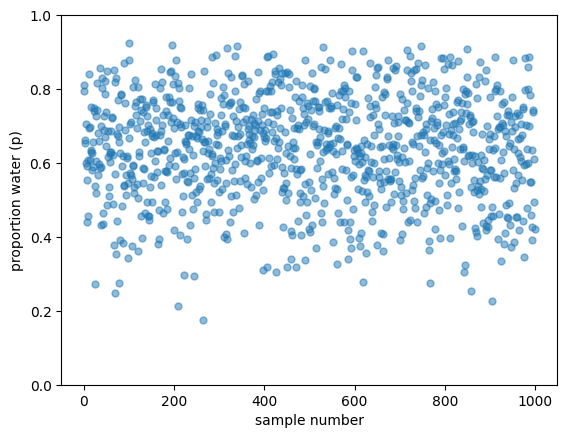

In [29]:
plt.plot(samples, '.', alpha=0.5, markersize=10)
plt.xlabel('sample number')
plt.ylabel('proportion water (p)')
plt.ylim((0,1));

### Code 3.5

Text(0, 0.5, 'Density')

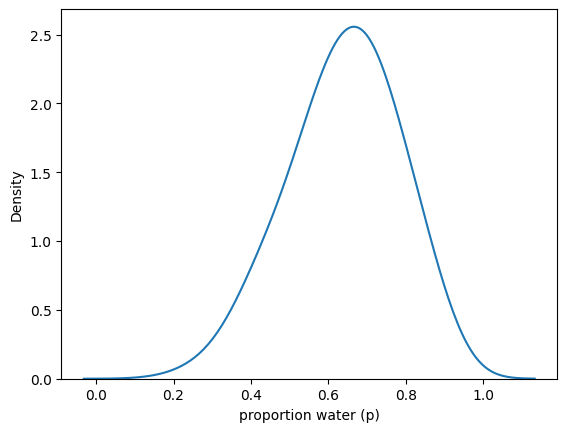

In [32]:
sns.kdeplot(samples, bw_method=0.5)
plt.xlabel('proportion water (p)')
plt.ylabel('Density')

### Code 3.6

In [36]:
sum(posterior[p_grid < 0.5])

0.17187458902022879

### Code 3.7

In [43]:
sum(samples < 0.5) / GRID_SIZE

0.168

### Code 3.8

In [44]:
sum((samples > 0.5) & (samples < 0.75)) / GRID_SIZE

0.609

### Code 3.9

In [41]:
np.quantile(samples, 0.8)

0.7607607607607607

### Code 3.10

In [42]:
np.quantile(samples, [0.1, 0.9])

array([0.44334334, 0.81591592])

### Code 3.11

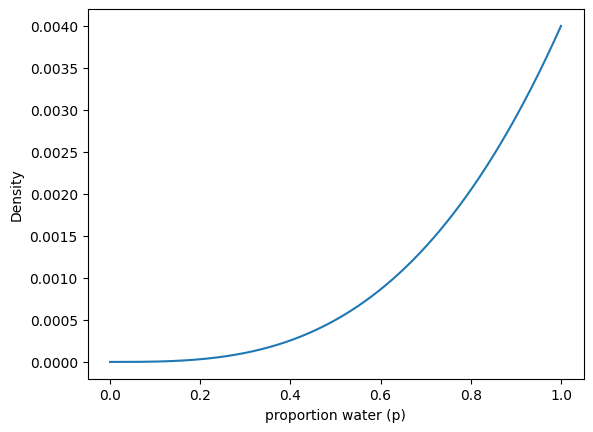

In [46]:
p_grid = np.linspace(0, 1, GRID_SIZE)
prior = np.repeat(1, GRID_SIZE)
likelihood = stats.binom.pmf(k=3, n=3, p=p_grid)
posterior = likelihood * prior
posterior = posterior / posterior.sum()
samples = np.random.choice(p_grid, size=GRID_SIZE, replace=True, p=posterior)

plt.plot(p_grid, posterior)
plt.xlabel("proportion water (p)")
plt.ylabel("Density");

### Code 3.12

In [47]:
np.percentile(samples, [25, 75])

array([0.7002002 , 0.92092092])

### Code 3.13

In [53]:
az.hdi(samples, hdi_prob=0.5)

array([0.82582583, 1.        ])